In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('/kaggle/input/lung-cancer/survey lung cancer.csv')

In [3]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
data.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [5]:
data.shape

(309, 16)

In [6]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [7]:
data.duplicated().sum()

33

In [8]:
data = data.drop_duplicates()

In [9]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            

In [11]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [12]:
from sklearn import preprocessing

In [13]:
label_encoder = preprocessing.LabelEncoder()

In [14]:
data['GENDER']= label_encoder.fit_transform(data['GENDER'])
data['LUNG_CANCER']= label_encoder.fit_transform(data['LUNG_CANCER'])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int64
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  LUNG_CANCER            276 non-null    i

In [16]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [17]:
data.nunique()

GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64

In [18]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [19]:
data_new = data[['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']]

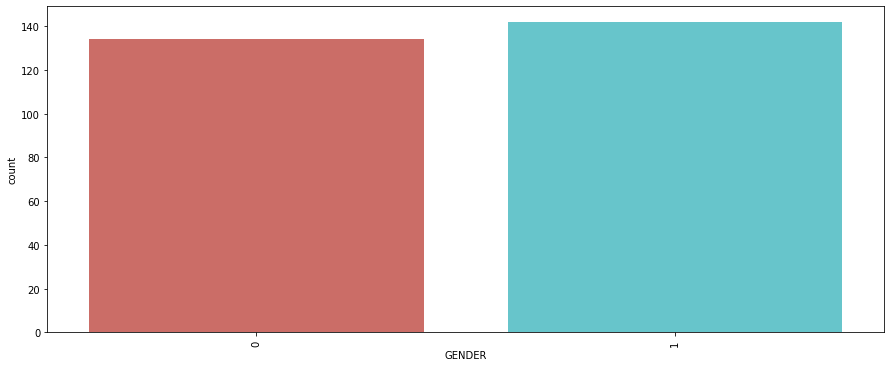

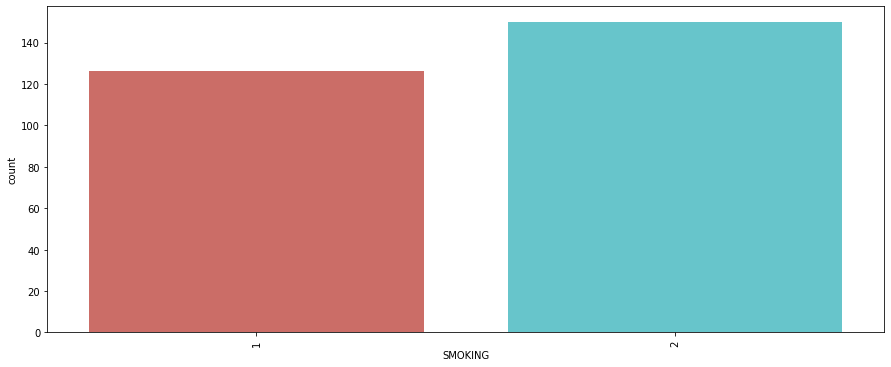

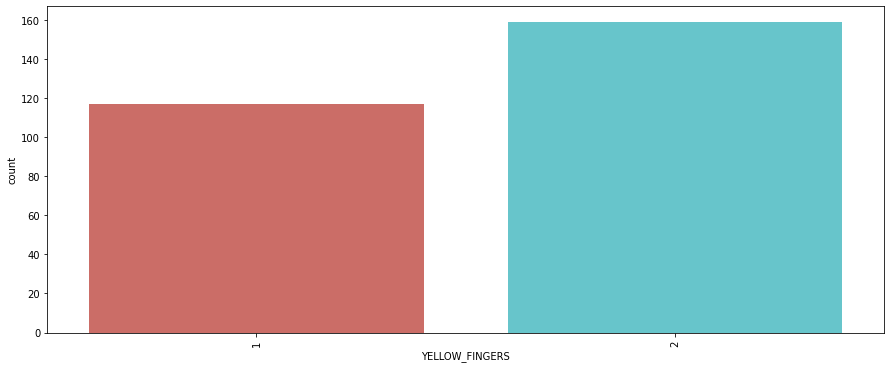

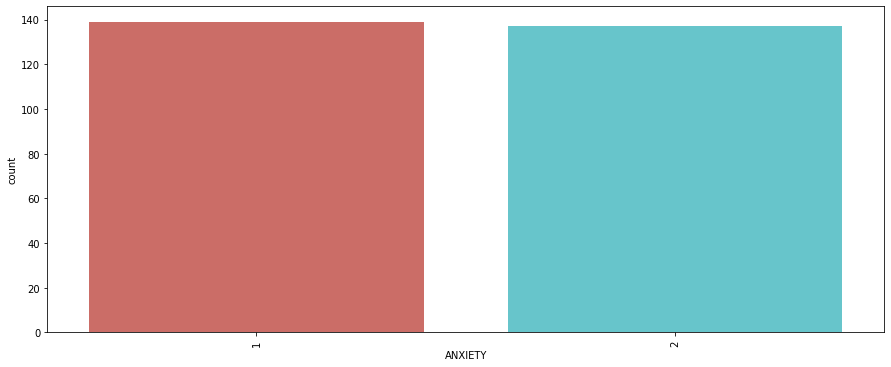

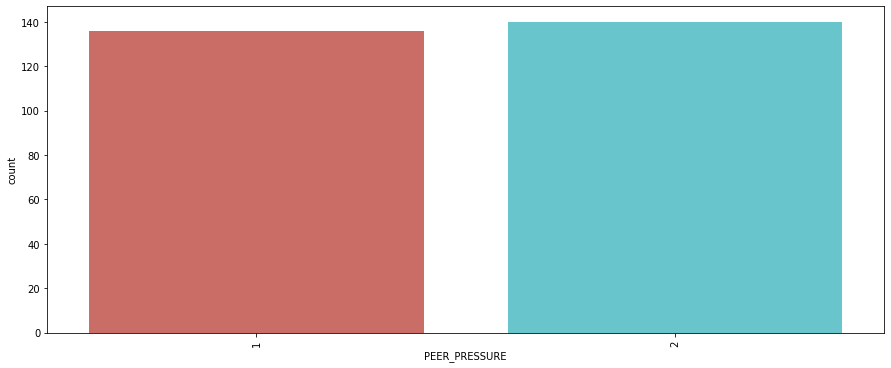

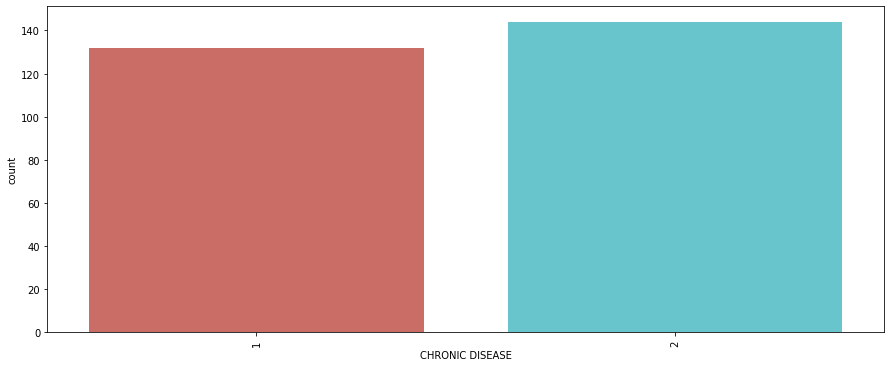

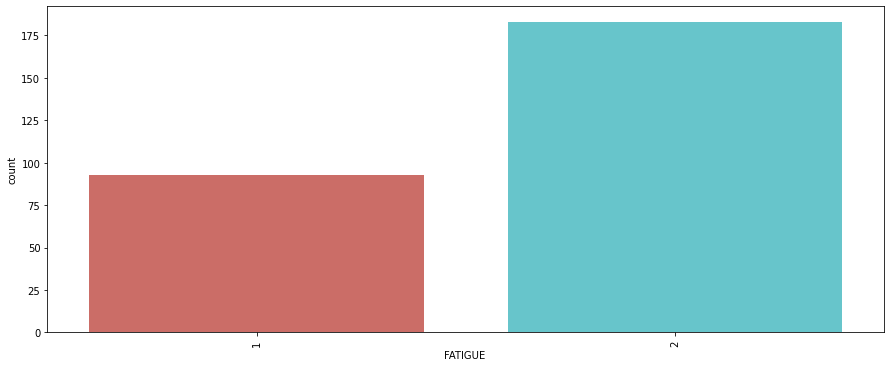

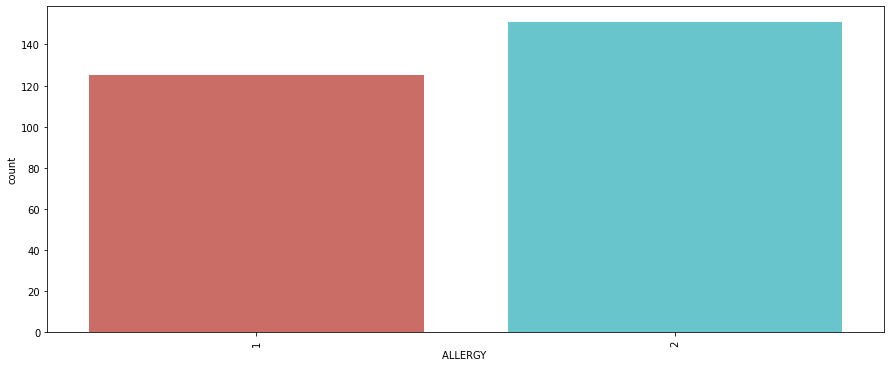

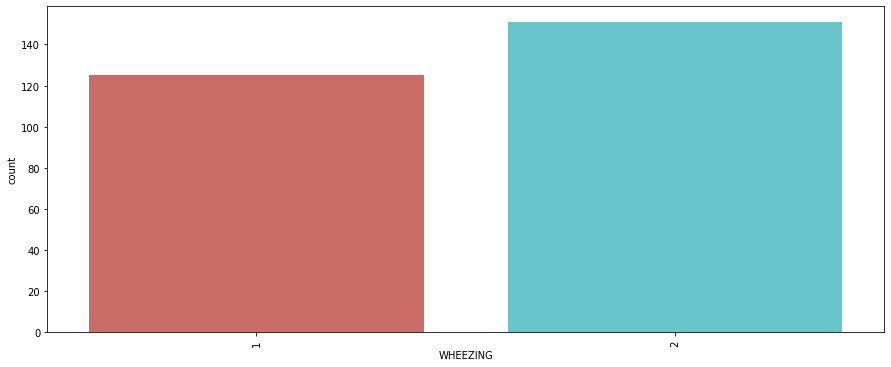

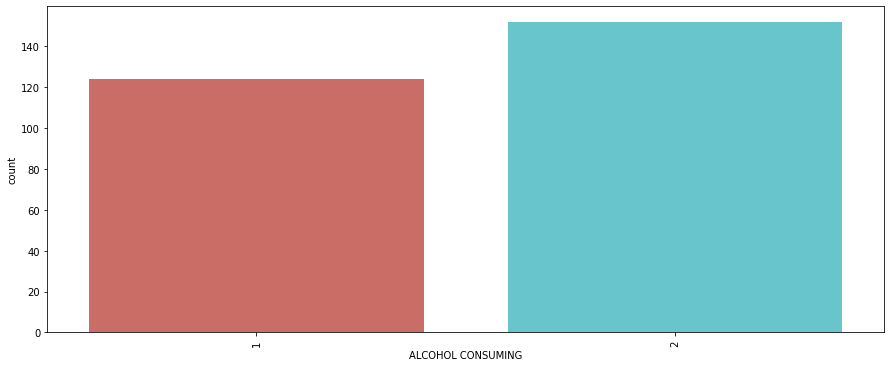

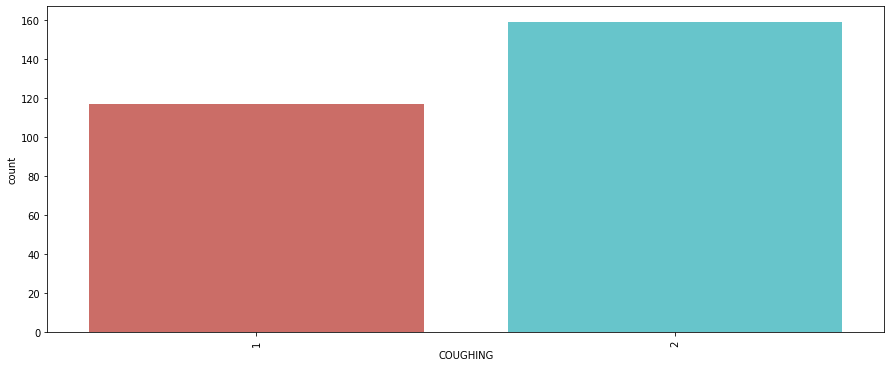

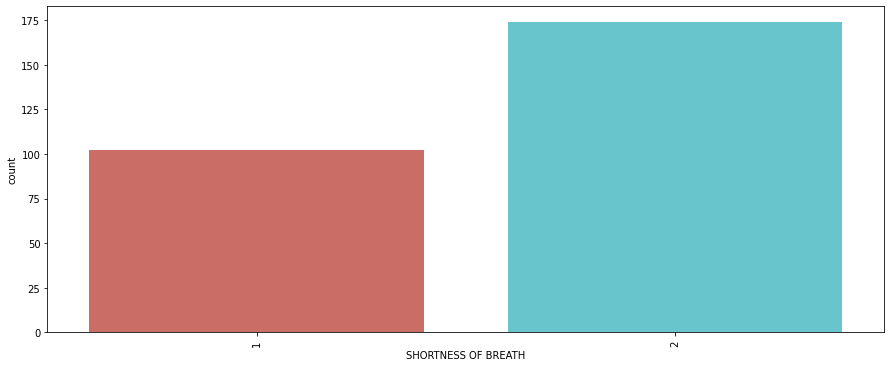

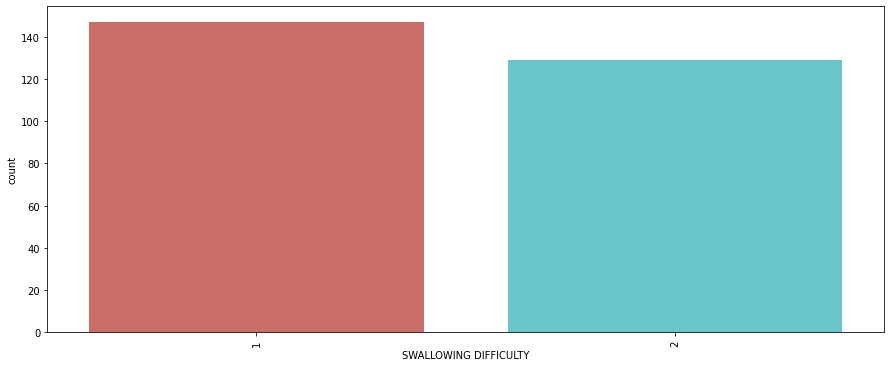

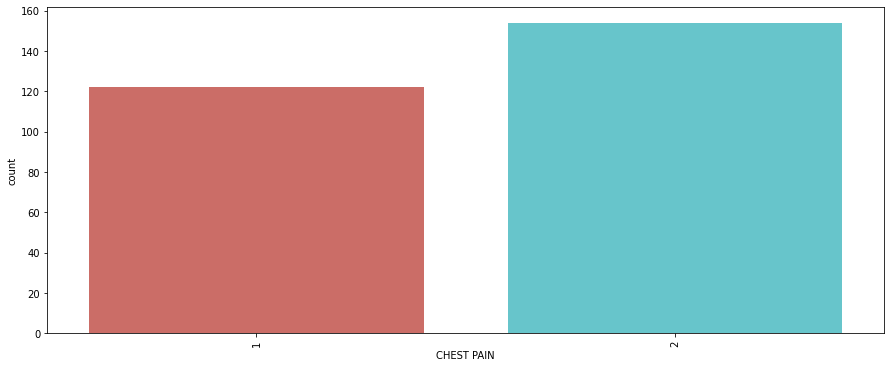

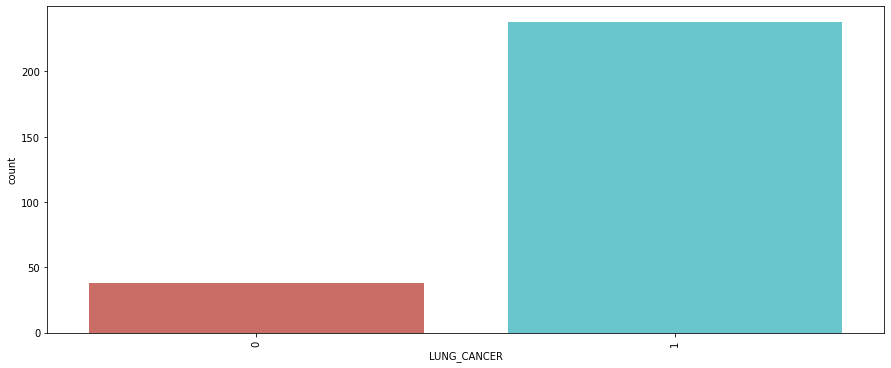

In [20]:
for i in data_new.columns:
    plt.figure(figsize=(15,6))
    sns.countplot(data_new[i], data = data_new, 
                  palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

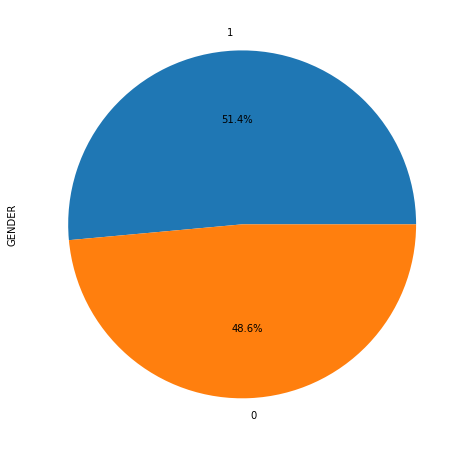

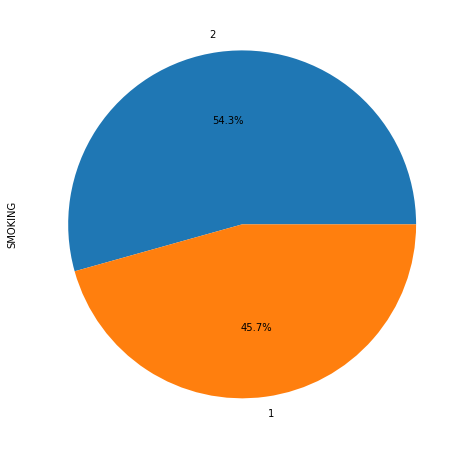

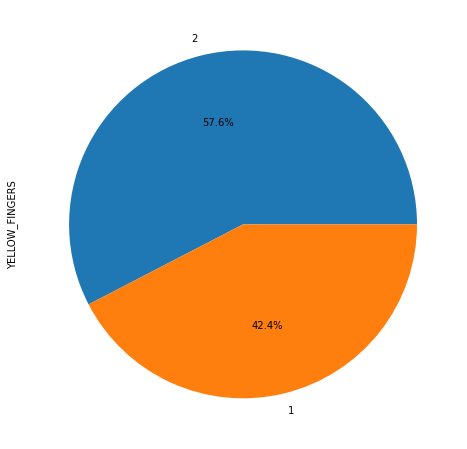

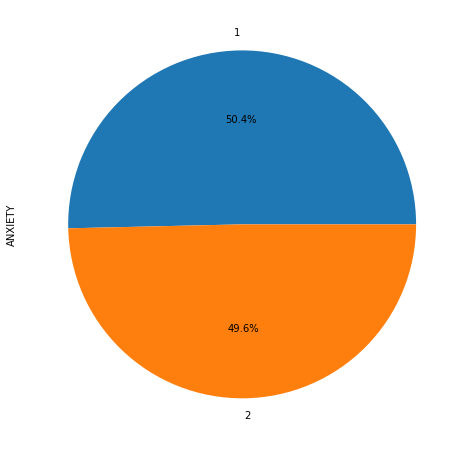

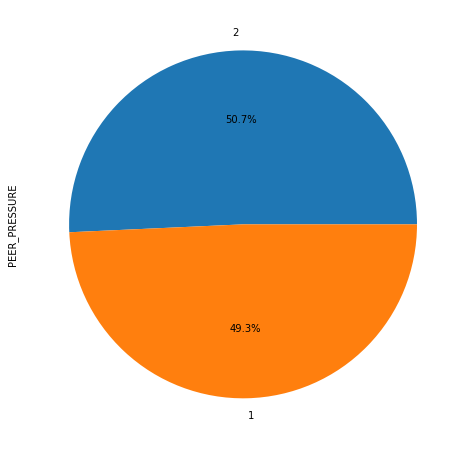

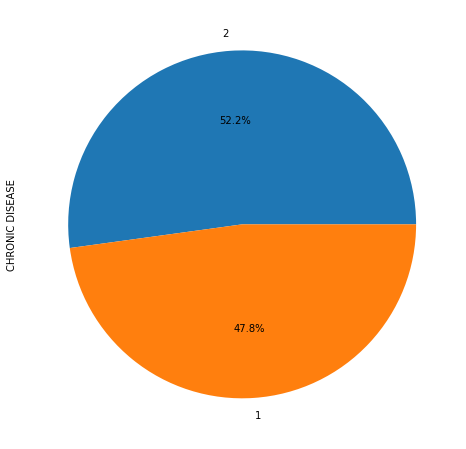

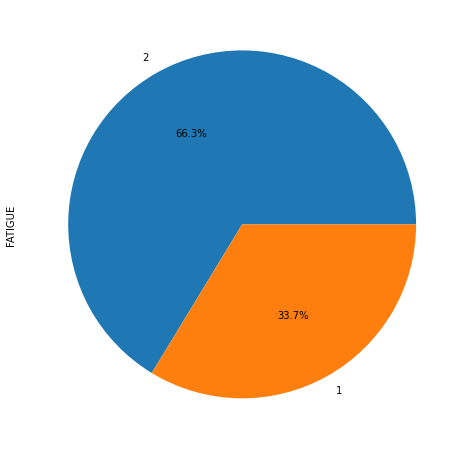

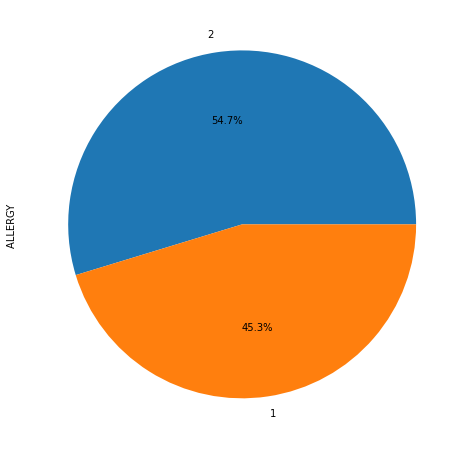

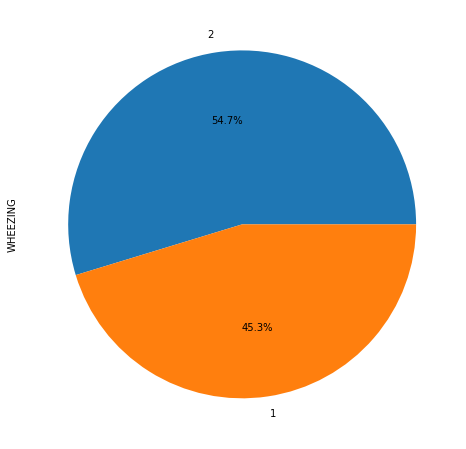

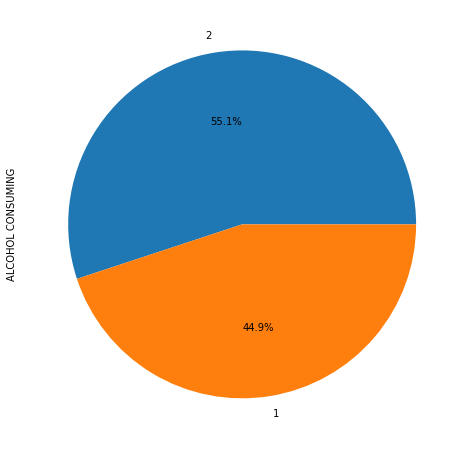

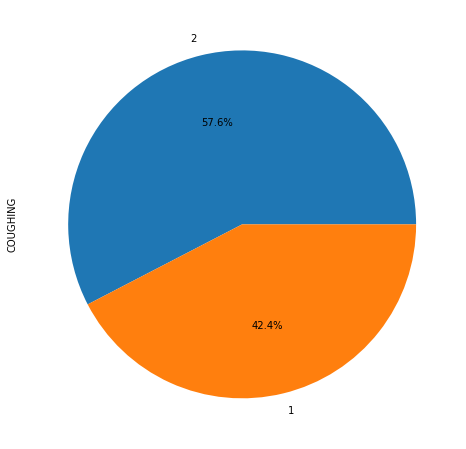

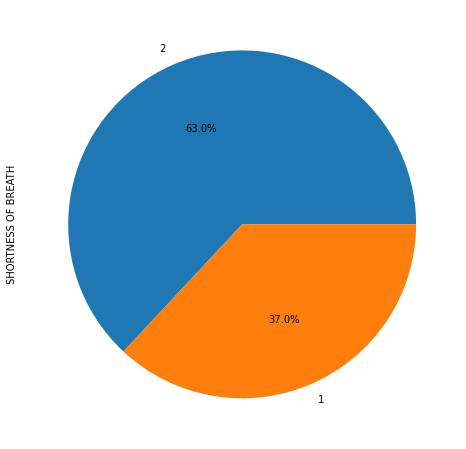

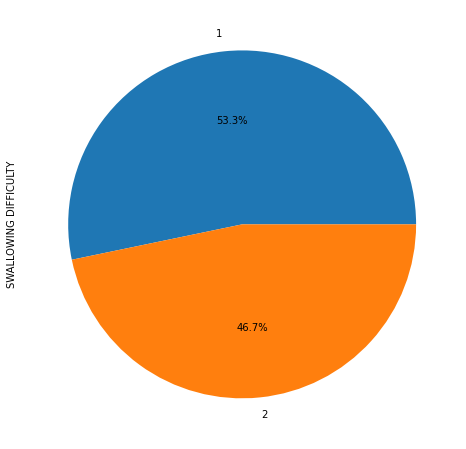

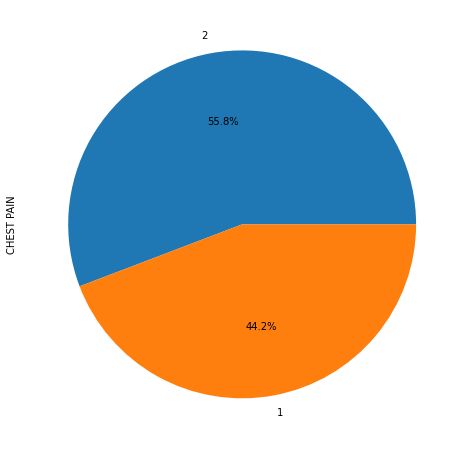

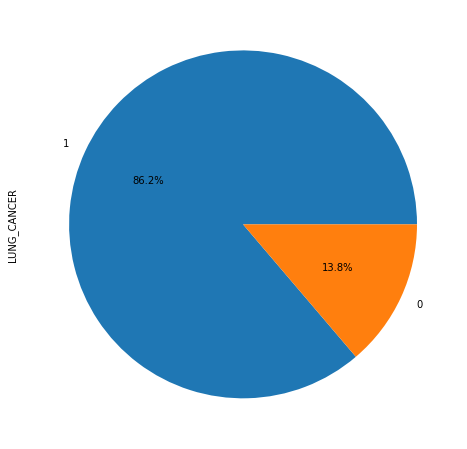

In [21]:
for i in data_new.columns:
    data_new[i].value_counts().plot(kind='pie',
                                    figsize=(8, 8),
                                    autopct='%1.1f%%')
    plt.xticks(rotation = 90)
    plt.show()

In [22]:
data_new['LUNG_CANCER'].unique()

array([1, 0])

In [23]:
data_new['LUNG_CANCER'].value_counts()

1    238
0     38
Name: LUNG_CANCER, dtype: int64

In [24]:
100. * data_new.LUNG_CANCER.value_counts() / len(data_new.LUNG_CANCER)

1    86.231884
0    13.768116
Name: LUNG_CANCER, dtype: float64

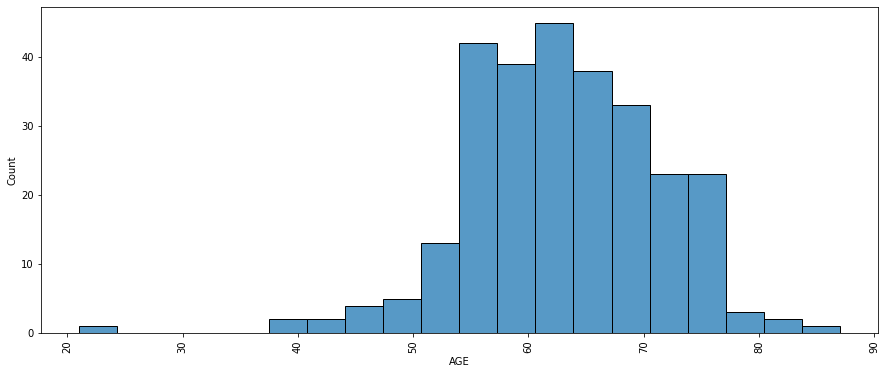

In [25]:
plt.figure(figsize=(15,6))
sns.histplot(data['AGE'])
plt.xticks(rotation = 90)
plt.show()

In [26]:
data_new['GENDER'].unique()

array([1, 0])

In [27]:
data_new['GENDER'].value_counts()

1    142
0    134
Name: GENDER, dtype: int64

In [28]:
100. * data_new.GENDER.value_counts() / len(data_new.GENDER)

1    51.449275
0    48.550725
Name: GENDER, dtype: float64

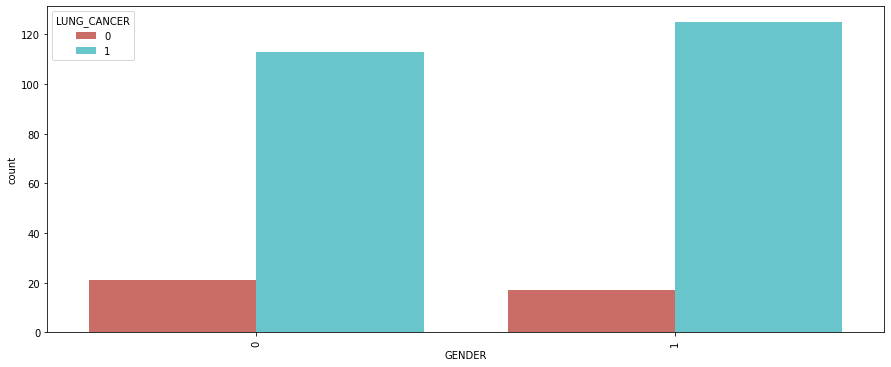

In [29]:
plt.figure(figsize=(15,6))
sns.countplot('GENDER', data = data_new, hue = 'LUNG_CANCER',
             palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

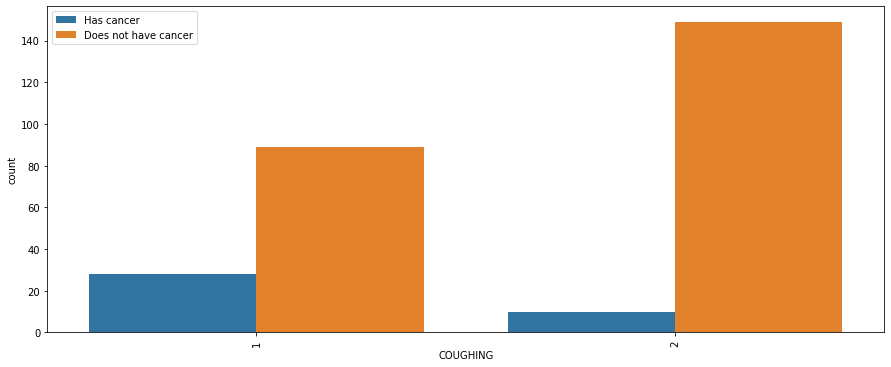

In [30]:
plt.figure(figsize=(15,6))
sns.countplot(data=data_new,x='COUGHING',hue='LUNG_CANCER')
plt.legend(["Has cancer", 'Does not have cancer'])
plt.xticks(rotation = 90)
plt.show()

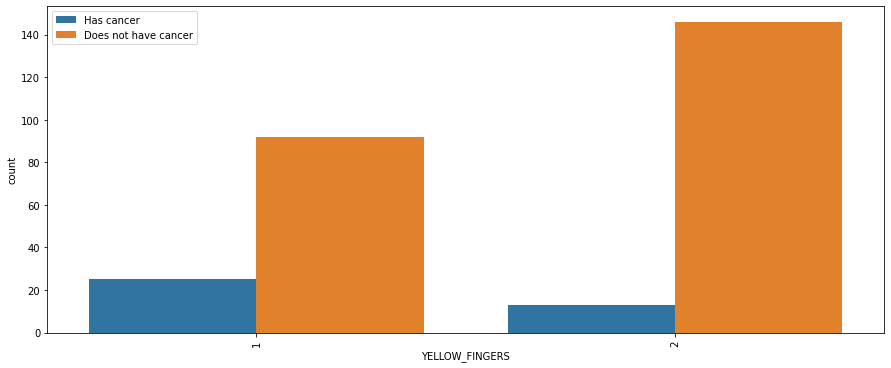

In [31]:
plt.figure(figsize=(15,6))
sns.countplot(data=data_new,x='YELLOW_FINGERS',hue='LUNG_CANCER')
plt.legend(["Has cancer", 'Does not have cancer'])
plt.xticks(rotation = 90)
plt.show()

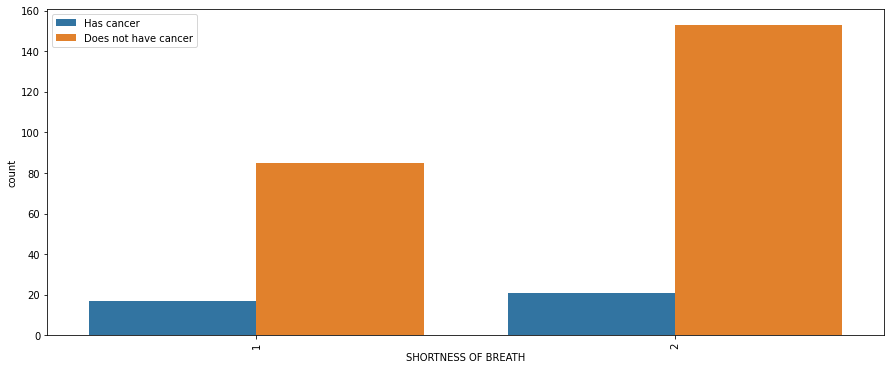

In [32]:
plt.figure(figsize=(15,6))
sns.countplot(data=data_new,x='SHORTNESS OF BREATH',hue='LUNG_CANCER')
plt.legend(["Has cancer", 'Does not have cancer'])
plt.xticks(rotation = 90)
plt.show()

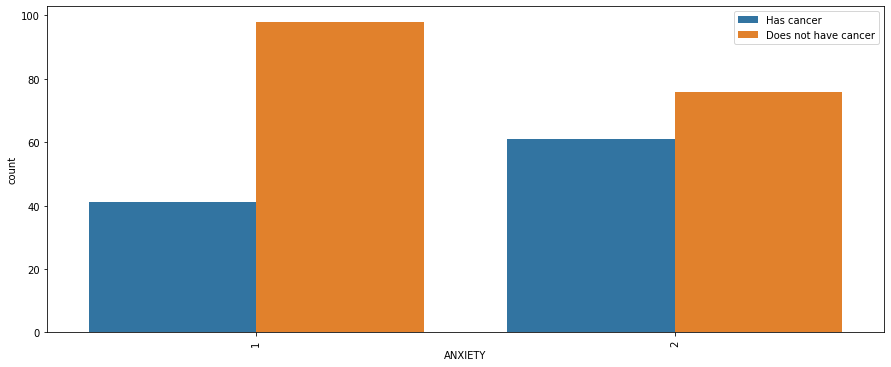

In [33]:
plt.figure(figsize=(15,6))
sns.countplot(data=data_new,x='ANXIETY',hue='SHORTNESS OF BREATH')
plt.legend(["Has cancer", 'Does not have cancer'])
plt.xticks(rotation = 90)
plt.show()

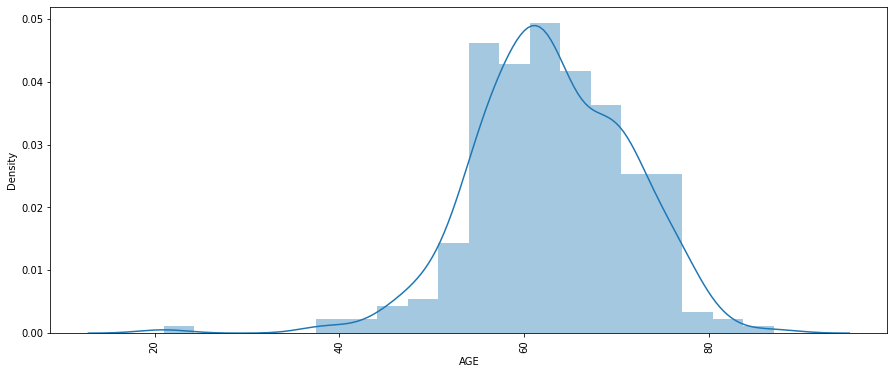

In [34]:
plt.figure(figsize=(15,6))
sns.distplot(data['AGE'])
plt.xticks(rotation = 90)
plt.show()

In [35]:
corrmat = data_new.corr()
corrmat

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,0.041131,-0.202506,-0.152032,-0.261427,-0.189925,-0.079020,0.150174,0.121047,0.434264,0.120228,-0.052893,-0.048959,0.361547,0.053666
SMOKING,0.041131,1.000000,-0.020799,0.153389,-0.030364,-0.149415,-0.037803,-0.030179,-0.147081,-0.052771,-0.138553,0.051761,0.042152,0.106984,0.034878
YELLOW_FINGERS,-0.202506,-0.020799,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,-0.109959,0.333349,-0.099169,0.189192
ANXIETY,-0.152032,0.153389,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,-0.155678,0.478820,-0.123182,0.144322
PEER_PRESSURE,-0.261427,-0.030364,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,-0.214115,0.327764,-0.074655,0.195086
CHRONIC DISEASE,-0.189925,-0.149415,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,-0.011760,0.068263,-0.048895,0.143692
FATIGUE,-0.079020,-0.037803,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,0.407027,-0.115727,0.013757,0.160078
ALLERGY,0.150174,-0.030179,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.018030,-0.037581,0.245440,0.333552
WHEEZING,0.121047,-0.147081,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.042289,0.108304,0.142846,0.249054
ALCOHOL CONSUMING,0.434264,-0.052771,-0.273643,-0.152228,-0.132603,0.010144,-0.181573,0.378125,0.261061,1.000000,0.198023,-0.163370,-0.000635,0.310767,0.294422


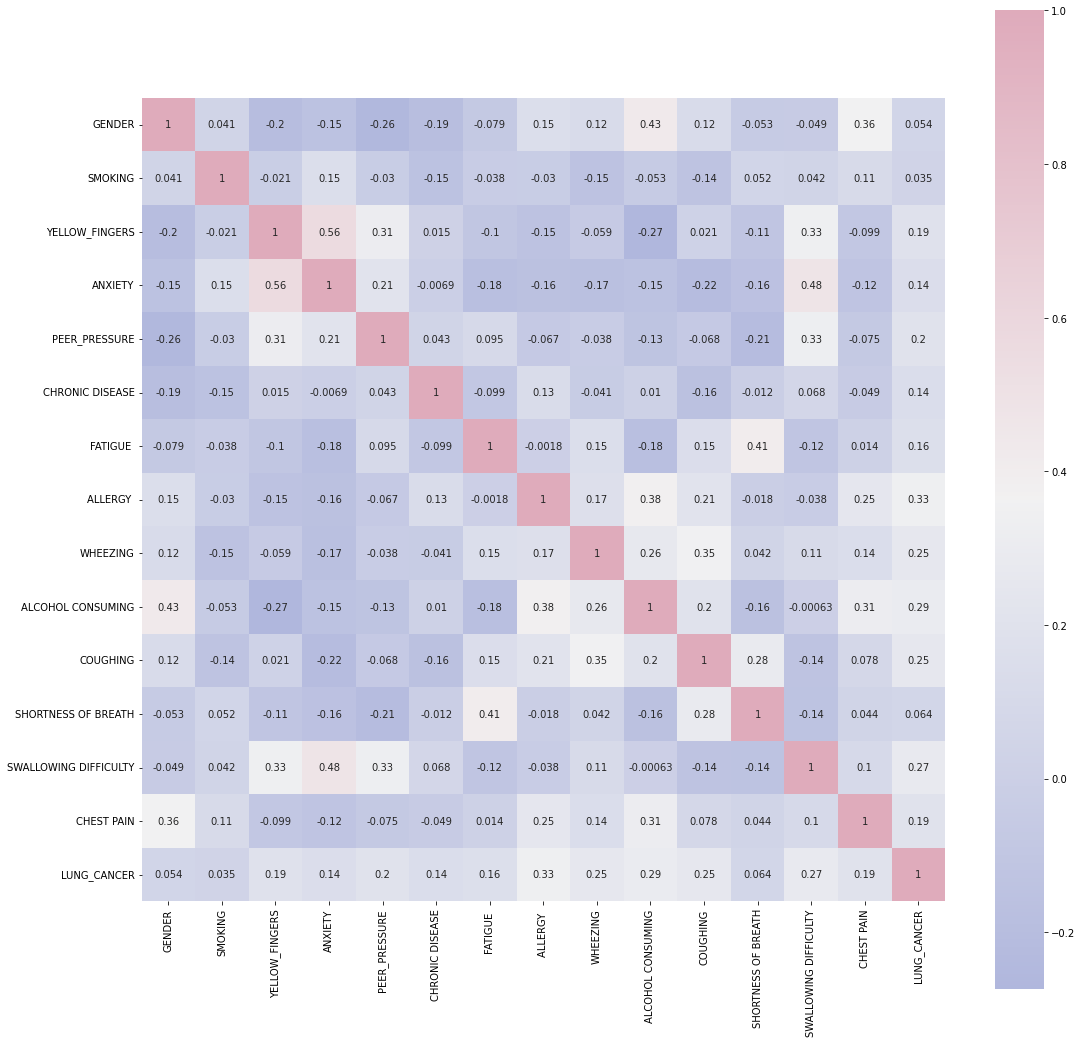

In [36]:
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, 
                             as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)
plt.show()

In [37]:
x = data_new.drop('LUNG_CANCER', axis = 1)
y = data_new['LUNG_CANCER']

In [38]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, 
                                                   test_size= 0.25, 
                                                   random_state=0)  

In [39]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)  

LogisticRegression(random_state=0)

In [40]:
y_pred= classifier.predict(x_test)  

In [41]:
from sklearn.metrics import accuracy_score, mean_absolute_error , mean_squared_error, confusion_matrix, median_absolute_error,classification_report, f1_score,recall_score,precision_score

In [42]:
from sklearn.metrics import plot_roc_curve

In [43]:
print("Mean absolute error is ",( mean_absolute_error(y_test,y_pred)))
print("Mean squared  error is " , mean_squared_error(y_test,y_pred))
print("Median absolute error is " ,median_absolute_error(y_test,y_pred)) 
print("Accuracy is " , round(accuracy_score(y_test,y_pred)*100,2),"%")
print("F1 score: ", round(f1_score(y_test,y_pred, average='weighted')*100,2),"%")

Mean absolute error is  0.10144927536231885
Mean squared  error is  0.10144927536231885
Median absolute error is  0.0
Accuracy is  89.86 %
F1 score:  90.08 %


In [44]:
matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)

tp, fn, fp, tn = confusion_matrix(y_test,y_pred,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[56  4]
 [ 3  6]]
Outcome values : 
 56 4 3 6
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.93      0.94        60
           0       0.60      0.67      0.63         9

    accuracy                           0.90        69
   macro avg       0.77      0.80      0.79        69
weighted avg       0.90      0.90      0.90        69

